**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

**TAKING IMAGE AND SHOWING IT**

In [2]:
image=plt.imread("mario.png")

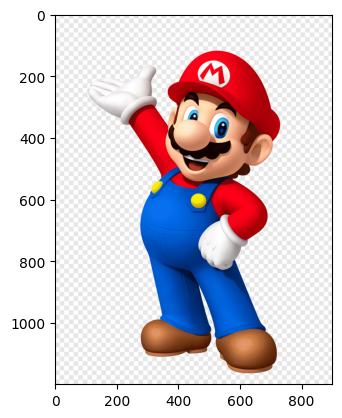

In [3]:
plt.imshow(image)

**GRAYSCALING**

In [4]:
def grey(image):
    return np.mean(image, axis=2)
grey_image = grey(image) 

In [5]:
sobel_x = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])

sobel_y = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])

**BLURRING**

In [6]:
def convolve(image, kernel, stride = 1):
    height , width = image.shape
    ker_height, ker_width = kernel.shape
    ans = np.empty((math.ceil((height+1-ker_height)/stride),math.ceil((width+1-ker_width)/stride)))
    for i in range(0,ans.shape[0],stride):
        for j in range(0, ans.shape[1],stride):
            roi = image[i:i+ker_height, j:j+ker_width]
            ans[i,j] = np.sum(roi * kernel)
    return ans
grey_matrix=np.array([[1,2,1],[2,4,2],[1,2,1]])
grey_image=convolve(grey_image,grey_matrix)

**DETECTING EDGES**

In [7]:
edge_x = convolve(grey_image, sobel_x)
edge_y = convolve(grey_image, sobel_y)

In [8]:
edges_combined = np.sqrt(edge_x ** 2 + edge_y ** 2)

**PLOTTING ORIGINAL AND SOBEL IMAGE**

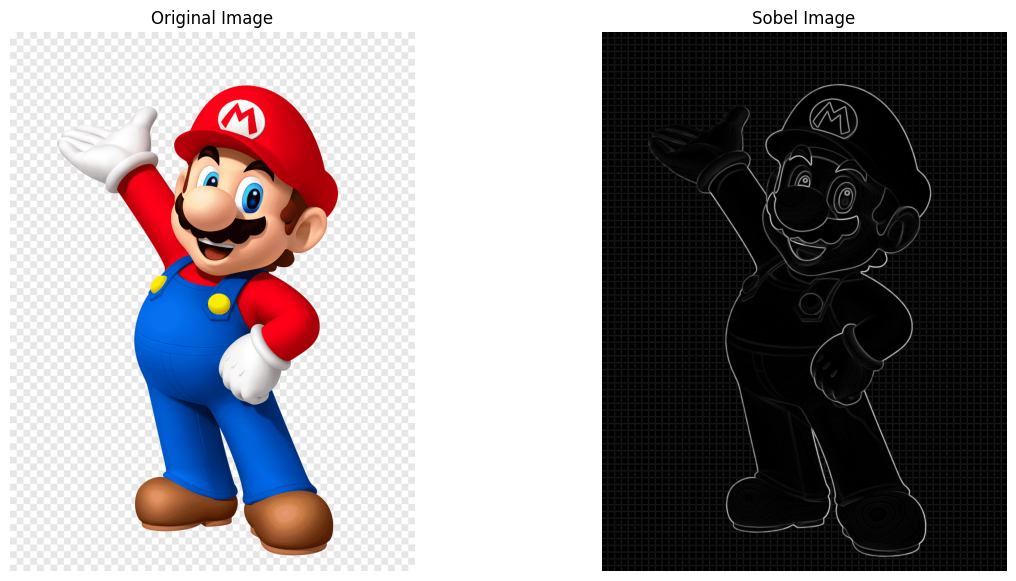

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(edges_combined, cmap="grey")
axes[1].set_title("Sobel Image")
axes[1].axis("off")

plt.show()

**User Input**

Give the path of file:  tokyo2.jpeg


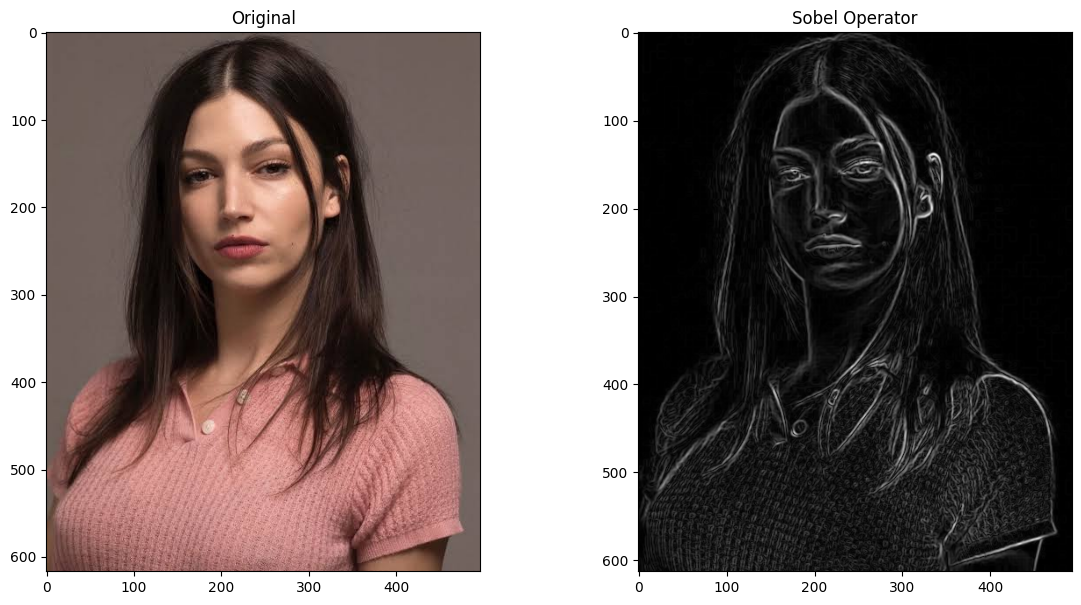

In [10]:
def ask_for_image():
    path = input('Give the path of file: ')
    path = path.replace('\\', '\\\\').strip('\'').strip('\"')
    try:
        image = plt.imread(path)
        return image
    except IOError:
        print("Please enter COMPLETE path to the IMAGE FILE.")
        return None

image = ask_for_image()
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original")
# grayscaling
image = grey(image)
# blurring
image = convolve(image,np.array([[1,2,1],[2,4,2],[1,2,1]]))
# detecting edges
edge_x = convolve(image, sobel_x)
edge_y = convolve(image, sobel_y)
edges_combined = np.sqrt(edge_x ** 2 + edge_y ** 2)
plt.subplot(1,2,2)
plt.imshow(edges_combined, cmap="gray")
plt.title("Sobel Operator");